In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = "retina"

# Wavelets & Cone of Influence

The first thing that we need to do is to import the necessary modules:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from periodicity.data import SpottedStar
from periodicity.timefrequency import WPS
from periodicity.core import Timeseries

In [4]:
plt.rc('lines', linewidth=1.0, linestyle='-', color='black')
plt.rc('font', family='sans-serif', weight='normal', size=12.0)
plt.rc('text', color='black', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rc('axes', edgecolor='black', facecolor='white', linewidth=1.0, grid=False,
       titlesize='x-large', labelsize='x-large', labelweight='normal', labelcolor='black')
plt.rc('axes.formatter', limits=(-4, 4))
plt.rc(('xtick', 'ytick'), labelsize='x-large', direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc(('xtick.major', 'ytick.major'), size=7, pad=6, width=1.0)
plt.rc(('xtick.minor', 'ytick.minor'), size=4, pad=6, width=1.0, visible=True)
plt.rc('legend', numpoints=1, fontsize='x-large', shadow=False, frameon=False)

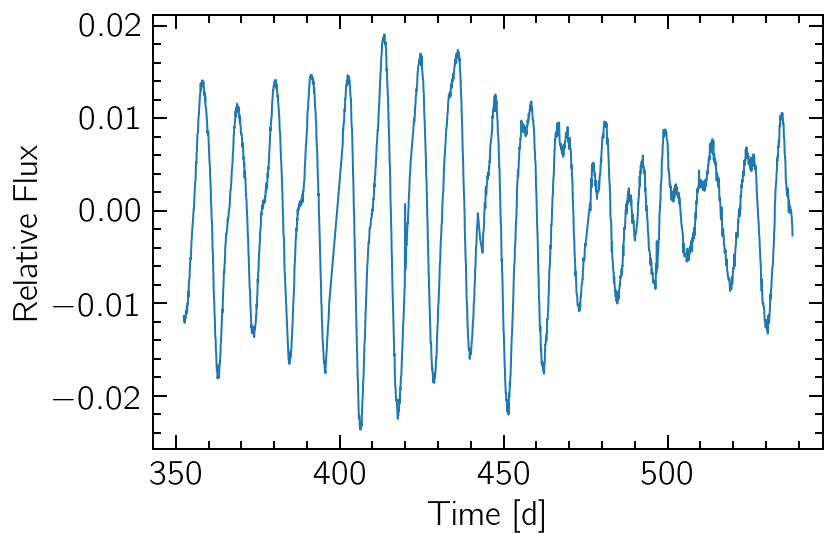

In [5]:
t, y, dy = SpottedStar()
sig = Timeseries(t, y)
sig.plot()
_ = plt.xlabel('Time [d]')
_ = plt.ylabel('Relative Flux')

In [6]:
periods = np.logspace(0, 7, 1000, base=2)

## Plotting the Wavelet Power Spectrum

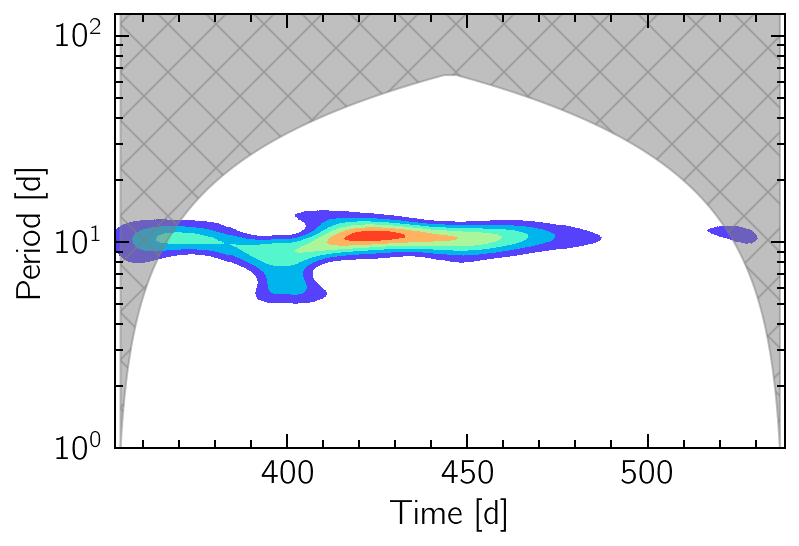

In [7]:
wps = WPS(periods)
spectrum = wps(sig)
cmap = plt.cm.get_cmap('rainbow')
cmap.set_under('w')
wps.contour(cmap=cmap, extend='min')
wps.plot_coi(hatch='x', color='grey', alpha=0.5)
_ = plt.yscale('log')
_ = plt.xlabel('Time [d]')
_ = plt.ylabel('Period [d]')

## The Scale Average Variance (SAV)

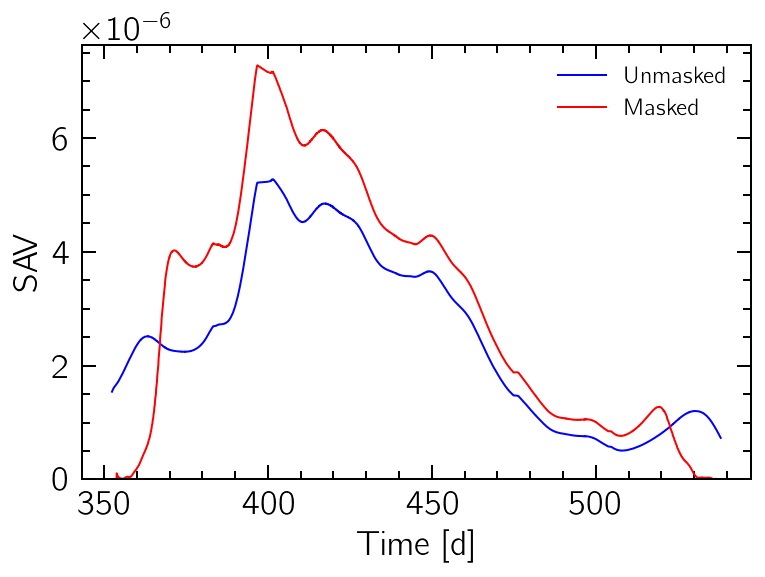

In [8]:
wps.sav().plot('b', label='Unmasked')
wps.masked_sav().plot('r', label='Masked')
_ = plt.ylim(0)
_ = plt.xlabel('Time [d]')
_ = plt.ylabel('SAV')
_ = plt.legend(fontsize=12)

## The Global Wavelet Power Spectrum

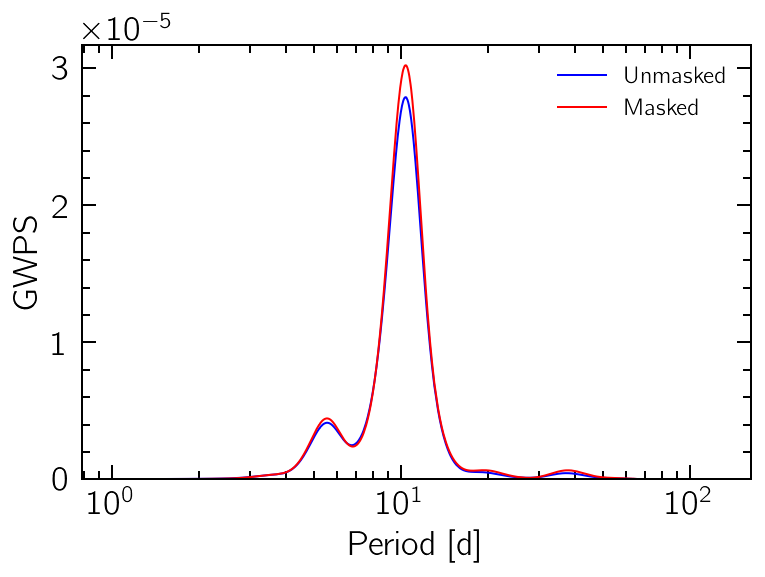

In [9]:
wps.gwps().plot('b', label='Unmasked')
wps.masked_gwps().plot('r', label='Masked')
_ = plt.ylim(0)
_ = plt.xlabel('Period [d]')
_ = plt.ylabel('GWPS')
_ = plt.xscale('log')
_ = plt.legend(fontsize=12)

In [10]:
print(wps.gwps().max().period, wps.masked_gwps().max().period)

10.391826740281603 10.391826740281603
